In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../') # import modules from ../

# Aggregation and Monthly plots

NB: Aggregation could also be used to improve the performance of weekly plots

In [4]:
import logging
import time
import pandas as pd
import numpy as np
import datahandling as dh
from graphing import set_mpl_params
from report import *

In [5]:
logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)
set_mpl_params()

In [6]:
input_datafiles = [
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00000.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00001.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00002.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00003.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00004.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00005.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00006.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00007.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00008.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00009.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00010.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00011.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00012.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00013.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00014.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00015.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00016.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00017.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00018.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00019.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00020.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00021.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00022.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00023.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00024.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00025.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00026.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00027.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00028.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00029.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00030.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00031.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00032.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00033.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00034.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00035.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00036.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00037.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00038.bin',
    '/Users/sam/Downloads/BuildAX/Millenium(bax19)/out00039.bin'
]

In [7]:
df, dfs, t_start, t_end = read_data(input_datafiles)

INFO:datahandling:Reading data from /Users/sam/Downloads/BuildAX/Millenium(bax19)/out00002.bin
INFO:datahandling:Reading data from /Users/sam/Downloads/BuildAX/Millenium(bax19)/out00006.bin
INFO:datahandling:Reading data from /Users/sam/Downloads/BuildAX/Millenium(bax19)/out00008.bin
INFO:datahandling:Reading data from /Users/sam/Downloads/BuildAX/Millenium(bax19)/out00004.bin
INFO:datahandling:Reading data from /Users/sam/Downloads/BuildAX/Millenium(bax19)/out00000.bin
INFO:datahandling:Reading data from /Users/sam/Downloads/BuildAX/Millenium(bax19)/out00010.bin
INFO:datahandling:Reading data from /Users/sam/Downloads/BuildAX/Millenium(bax19)/out00012.bin
INFO:datahandling:Reading data from /Users/sam/Downloads/BuildAX/Millenium(bax19)/out00014.bin
INFO:datahandling:Detected MIME: application/octet-stream
INFO:datahandling:Detected MIME: application/octet-stream
INFO:datahandling:Detected MIME: application/octet-stream
INFO:datahandling:Detected MIME: application/octet-stream
INFO:dat

In [8]:
dfs = sensor_stats(dfs, 100)

INFO:report: ID      | Packets 
INFO:report:=========|=========
INFO:report:42F1D589 | 161483
INFO:report:42C6E09D | 156771
INFO:report:42362DD4 | 154219
INFO:report:42AD5F61 | 154756
INFO:report:4245B50A | 161951
INFO:report:4293D096 | 167823
INFO:report:42FF727D | 149506
INFO:report:422D4B48 | 160323
INFO:report:42C7645F | 95306
INFO:report:428A5448 | 163804
INFO:report:429284E5 | 99438
INFO:report:427B836E | 140868
INFO:report:42600766 | 154289
INFO:report:4236492B | 163100
INFO:report:421B6A82 | 1010


In [9]:
t_start, t_end

(Timestamp('2016-11-24 13:54:50'), Timestamp('2017-01-19 23:38:53'))

### Get week range

In [10]:
weeks = get_week_range(df)
len(weeks)

9

### Get month range

In [11]:
months = get_month_range(df)
months

[(Timestamp('2016-11-01 00:00:00'), Timestamp('2016-11-30 23:59:59')),
 (Timestamp('2016-12-01 00:00:00'), Timestamp('2016-12-31 23:59:59')),
 (Timestamp('2017-01-01 00:00:00'), Timestamp('2017-01-31 23:59:59'))]

### Check data

In [12]:
dfs[list(dfs.keys())[0]][:5]

,Name,RSSI,Type,SequenceNo,TransmitPower,Battery,Humidity,Temp,Light,PIRCount,PIREnergy,Switch,Event,PIRDiff
DateTime,,,,,,,,,,,,,,
2016-11-24 13:54:50,42F1D589,-66,1,125,20,2767,36.84,17.6,53,0,39790,1,NaN,NaN
2016-11-24 13:55:19,42F1D589,-66,1,126,20,2767,36.84,17.7,53,0,40094,1,NaN,NaN
2016-11-24 13:55:48,42F1D589,-65,1,127,20,2767,36.84,17.7,52,0,40416,1,NaN,0.620690
2016-11-24 13:56:17,42F1D589,-64,1,128,20,2767,36.80,17.7,52,0,40720,1,NaN,-0.620690
2016-11-24 13:56:46,42F1D589,-64,1,129,20,2767,36.80,17.7,52,0,41029,1,NaN,0.172414


In [13]:
data = dfs[list(dfs.keys())[0]]

## Single Column Aggregation

In [14]:
# Define the aggregation procedure outside of the groupby operation
data.groupby(pd.TimeGrouper(freq='D'))['Temp'].agg(['mean']).rename(columns={'mean':'Temp'})[-5:]

,Temp
DateTime,
2017-01-15,11.618037
2017-01-16,15.130741
2017-01-17,16.009578
2017-01-18,16.394056
2017-01-19,16.268819


## Multi-column aggregation

In [15]:
aggregate={
    'Temp': 'mean', 
    'Humidity':'mean',
    'Light':'mean',
    'Battery': 'min'
}

data.groupby(pd.TimeGrouper(freq='12h')) \
    .agg(aggregate)[:5]


,Temp,Humidity,Light,Battery
DateTime,,,,
2016-11-24 12:00:00,15.679630,38.631200,10.289855,2767
2016-11-25 00:00:00,13.761024,38.767911,17.209556,2767
2016-11-25 12:00:00,15.523995,36.116980,18.245399,2767
2016-11-26 00:00:00,12.127040,35.311279,12.096819,2767
2016-11-26 12:00:00,12.366826,44.125089,10.350889,2767


# Plotting aggregates

In [16]:
import mpl_toolkits.axisartist
import matplotlib.pyplot as plt

#
# Namespace for colors
def graph():
    pass

# Tableau20 colour scheme
graph.colors = ["#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c", "#98df8a", "#d62728",
                "#ff9896", "#9467bd", "#c5b0d5", "#8c564b", "#c49c94", "#e377c2", "#f7b6d2",
                "#7f7f7f", "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5"]

In [17]:
from pandas.tseries.offsets import MonthEnd, MonthBegin
t_start + MonthEnd() > t_end + MonthBegin()

False

In [18]:
log.setLevel(logging.DEBUG)

In [20]:
# Monthly graph
import calendar
from matplotlib.ticker import MaxNLocator
from pandas.tseries.offsets import MonthEnd, MonthBegin
import math
    
# ARGS:
# dfs (already defined)
series = "Temp"
y_label = "Temperature ˚C"
t_start, t_end = months[2]
cols=1
legend_rows=None
legend_cols=(len(labels) // legend_rows +1) if legend_rows else 6
grid=True
spline_alpha=0.1
txt_alpha=0.6

INFO:__main__:Temp     - 2017-01-01 00:00:00 to 2017-01-31 23:59:59
DEBUG:__main__:0,0
INFO:__main__:Graphing 12/26/16 Dec in cell 0 @0,0 (270017 values)
DEBUG:__main__:1,0
INFO:__main__:Graphing 01/02/17 Jan in cell 1 @1,0 (273785 values)
DEBUG:__main__:2,0
INFO:__main__:Graphing 01/09/17 Jan in cell 2 @2,0 (273975 values)
DEBUG:__main__:3,0
INFO:__main__:Graphing 01/16/17 Jan in cell 3 @3,0 (155075 values)
DEBUG:__main__:4,0
INFO:__main__:Graphing 01/23/17 Jan in cell 4 @4,0 (0 values)
DEBUG:__main__:5,0
INFO:__main__:Graphing 01/30/17 Jan in cell 5 @5,0 (0 values)


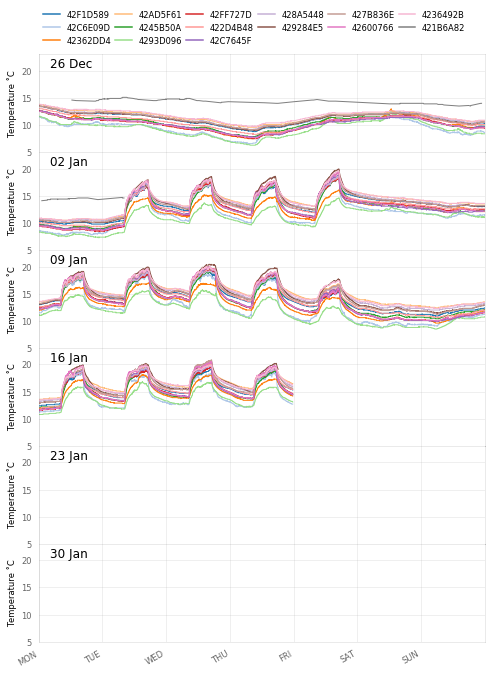

In [25]:
kwargs = {}
colors = kwargs.pop('colors', graph.colors)
spines = kwargs.pop('spines', {'top': True, 'bottom': True, 'left': True, 'right': True})
pad_pc = kwargs.pop('pad_pc', 10)

# Argument sanity check
if t_start + MonthEnd() > t_end + MonthBegin():
    raise ValueError("Date range passed is > 1 month: {0} to {1}".format(t_start, t_end))

# Calculate date range and required cells    
date_range = pd.date_range(t_start - pd.Timedelta('7 days'), t_end, freq='W-MON', normalize=True, closed=None, label='left')
cells = len(date_range)
rows = cells // cols



# Manually calculate range of y-axis data
# This is a workaround for a bug: Setting xlim with plt.sublplots(..., sharey=True) 
# causes the yaxis to center on 0 if plotted 2 plots with no y_data (0 range). Therefore, 
# restrict the y axis ticks manually using set_yticks and calculate the range pre-plot:
rng = list()  
for frame in dfs:
    try:
        mini = dfs[frame].groupby(pd.TimeGrouper(freq='M'))[series].agg(['min']) \
                   .rename(columns={'min':series}).loc[t_end.date()][series]

        maxi = dfs[frame].groupby(pd.TimeGrouper(freq='M'))[series].agg(['max']) \
                   .rename(columns={'max':series}).loc[t_end.date()][series]
            
        rng.append( (mini, maxi) )
        
    except KeyError as e:
        log.warning("Skipped {0} in range as there was no data for {1}".format(frame, t_end.date()))
        log.warning("The error was: {}".format(e))

rng = list(zip(*rng))

# Pad range by percentage:
rng = [min(rng[0]), max(rng[1])]
diff = rng[1] - rng[0]
rng = [math.floor(rng[0]-(diff*(pad_pc/100))), math.ceil(rng[1]+(diff*(pad_pc/100)))]



# Subplots, returned as a 2-d array
fig, axarr = plt.subplots(rows, cols)
fig.subplots_adjust(hspace=0, wspace=0)
fig.autofmt_xdate()

# Reformat axarr for 1x8 or 8x1 plots
if rows == 1:
    axarr = np.array([axarr,[]])
if cols == 1:
    axarr = np.array([[ax] for ax in axarr])

# Commented out as without sharey=True different ticks are sometimes generated
#plt.gca().yaxis.set_major_locator(MaxNLocator(prune='both'))

log.info("{0: <8} - {1} to {2}".format(series, str(t_start), str(t_end)))


# Start plotting at cell 1 (cell zero is legend)
i = 0
for week in date_range:
    
    start, end = (week, (week + pd.Timedelta('7 days')))
    row, col = (i // cols, i % cols)
    log.debug("{},{}".format(row,col))
    ax = axarr[row][col]

    
    # Pandas Data
    x_data = [dfs[i].loc[start:end, ].index for i in dfs]
    y_data = [dfs[i].loc[start:end, series].values for i in dfs]
    
    cardinality = sum([len(y) for y in y_data])
    log.info("Graphing {0} in cell {1} @{2},{3} ({4} values)"
              .format(start.date().strftime('%D %b'), 
                      i, row, col, cardinality) )
    
    # Iterate sensors
    for j in range(0, len(y_data)):
        ax.plot(x_data[j], y_data[j], color=colors[j % len(colors)])

    # Set graph limits
    ax.set_autoscale_on(False)
    ax.set_xlim(start, end) 
    ax.set_ylim(rng[0], rng[1])

    ax.set_title(
        # 'Axis [{0},{1}]'.format(row, col),
        start.date().strftime('%d %b'),
        loc='left', x=0.025, y=0.80)

    if grid:
        ax.grid(True, which="both", alpha=0.25)
    
    # Set spines for this grid box (the outside lines)
    for sp in spines.keys():
        ax.spines[sp].set_visible(spines[sp])
        ax.spines[sp].set_alpha(spline_alpha)
        
        
    # Set text/label alpha
    [l.set_alpha(txt_alpha) for l in ax.xaxis.get_ticklabels()]
    [l.set_alpha(txt_alpha) for l in ax.yaxis.get_ticklabels()]
    

    # Operations on the final (bottom) x axis row
    if row == rows-1:
        weekday_map = {0:'MON', 1:'TUE', 2:'WED', 3:'THU', 4:'FRI', 5:'SAT', 6:'SUN'}

        # Map weekdays to timestamps to match the correct day of the week (trimming last label)
        xs = sorted(ax.get_xticks())
        wd = pd.DatetimeIndex(pd.date_range(start=start, end=end, freq='D')).map(pd.Timestamp.weekday).values[:-1]

        ax.set_xticks(xs)
        ax.set_xticks([], minor=True)
        ax.set_xticklabels([weekday_map[d] for d in wd])
    
           
    # Fine-tune figure
    # Set labels on left column plots y-axis
    # Turn off y-axis tick labels in columns that aren't leftmost:
    if col > 0:
        [i.set_visible(False) for i in ax.yaxis.get_ticklabels()]
    else: # elif col == 0:
        ax.set_ylabel(y_label)
    
    # Fine-tune ticks
    ax.tick_params(
            axis='both',   # changes apply to both axis
            which='both',  # both major and minor ticks are affected
            bottom='off',  # ticks along the bottom edge are off
            top='off',     # ticks along the top edge are off
            left='off',
            right='off',
            labelbottom='on')  # labels along the bottom edge are on

    i += 1



# Leftover cell?
while i < cells:
    row, col = (i // cols, i % cols)
    ax = axarr[row][col]
    log.debug("Leftover cell")
    
    # Set spines for this grid box (the outside lines)
    for sp in spines.keys():
        ax.spines[sp].set_visible(spines[sp])
        ax.spines[sp].set_alpha(spline_alpha)
        
    ax.xaxis.get_ticklabels()[i].set_visible(False)
    
    i += 1


# Get the handles and labels for a legend
handles = axarr[0][1 if cols > 1 else 0].lines
labels = list(dfs.keys())

# Plot a legend inside the upper leftmost figure
leg = fig.legend(
        handles,
        labels,
        loc='upper left',
        bbox_to_anchor=(0.12, -.06, 1, 1),     # )left, bottom, width, height)
        bbox_transform=plt.gcf().transFigure,
        ncol=legend_cols,
        labelspacing=0.5,
        columnspacing=0.5,
        markerscale=2,
        frameon=False)

if leg is not None:
    plt.setp(leg.get_lines(), linewidth=1.5)  # the legend linewidth

plt.show()
plt.close()